<a href="https://colab.research.google.com/github/NeilCollinsMS/CTU-13-Classification/blob/main/CTU_13_Classification_(Per_Scenario).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CTU-13 Classification Project**

Per-Scenario Notbook (Each scenario is its own training and testing data)

Alternate notebook will be generated for aggregate models utilizing master data.

In [13]:
# Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt

In [46]:
# Load publicly accessible CTU-13 bidirectional netflow files into pandas dataframes. 
# Initially, I ran some .head() commands to make sure the data properly imported, but to avoid clutter, I will condense all of the file reading into one singular cell.
# If you want to look at the dataframes just type scenario_# (dataframe names) into a cell and you'll get a combo of heads/tails in Google Colab.

# Unfortunately, Google Colab hosts notebooks on virtual machines that it recycles every time the notebook disconnects. However, since each VM has limited RAM only run the necessary files.

# scenario_1 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow')
# scenario_2 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow')
# scenario_3 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow')
# scenario_4 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow')
# scenario_5 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow')
# scenario_6 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow')
# scenario_7 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow')
# scenario_8 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow')
# scenario_9 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow')
# scenario_10 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow')
# scenario_11 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow')
# scenario_12 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow')
# scenario_13 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow')

**Scenario 1 Model 1**

In [3]:
# Running all 13 scenarios takes a lot of RAM, so I am only using one at a time to not exceed Colab's RAM limit
scenario_1 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow')

In [4]:
# Generate binary malicious target column
scenario_1.loc[scenario_1['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_1.loc[scenario_1['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [5]:
# Checking to make sure that binary assignments worked
display(scenario_1.loc[scenario_1['SrcAddr'] == '147.32.84.165'])
display(scenario_1.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
675537,2011/08/10 11:04:24.863449,0.000278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V42-UDP-DNS,1.0
675872,2011/08/10 11:04:27.118993,0.020525,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V42-UDP-DNS,1.0
675877,2011/08/10 11:04:27.140727,0.045125,tcp,147.32.84.165,1027,->,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V42-TCP-HTTP-Google-Net-Estab...,1.0
689920,2011/08/10 11:06:23.268442,0.336250,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,215,71,flow=From-Botnet-V42-UDP-DNS,1.0
689955,2011/08/10 11:06:23.606888,3514.083496,tcp,147.32.84.165,1039,->,60.190.222.139,65520,SPA_SPA,0.0,0.0,120,7767,2690,flow=From-Botnet-V42-TCP-Established,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785281,2011/08/10 15:48:48.058272,0.000000,udp,147.32.84.165,2077,->,89.149.254.87,53,INT,0.0,NaN,1,72,72,flow=From-Botnet-V42-UDP-Attempt-DNS,1.0
2785303,2011/08/10 15:48:48.338346,0.000000,tcp,147.32.84.165,1081,->,202.59.166.29,25,S_,0.0,NaN,1,62,62,flow=From-Botnet-V42-TCP-Attempt-SPAM,1.0
2785326,2011/08/10 15:48:48.448462,0.000405,udp,147.32.84.165,2079,<->,147.32.80.9,53,CON,0.0,0.0,2,138,69,flow=From-Botnet-V42-UDP-DNS,1.0
2785382,2011/08/10 15:48:49.059334,0.056870,udp,147.32.84.165,2077,<->,188.65.208.29,53,CON,0.0,0.0,2,144,72,flow=From-Botnet-V42-UDP-DNS,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established,0.0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established,0.0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background,0.0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background,0.0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established,0.0


In [6]:
# Break data into target and features
y1 = scenario_1.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X1 = scenario_1[features].copy()

# Break data into training and testing data (80/20 split)
X1_train, X1_test, y1_train, y1_test, = train_test_split(X1,y1, train_size = 0.8, test_size = 0.2, random_state = 1)

In [7]:
# Generate base model
classifier_1 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [8]:
# Very high accuracy score...potential overfitting? Considering lowering leaf nodes or using 5 fold validation. 
predictions1 = classifier_1.predict(X1_test)

accuracy_score(y1_test, predictions1)

0.9919334853291039

In [9]:
pd.Series(y1_test).value_counts()

0.0    556617
1.0      8311
Name: Malicious, dtype: int64

In [10]:
pd.Series(predictions1).value_counts()

0.0    560056
1.0      4872
dtype: int64

In [11]:
# Decently solid F1 score, but could cause issues
f1_score(y1_test, predictions1)

0.6543275430478647

In [19]:
# Model skewed towards false positives. High number of True Negatives likely creating high accuracy score. Lean F1 here.

labels1 = np.unique(y1_test)
cm1 = confusion_matrix(y1_test, predictions1, labels=labels1)
pd.DataFrame(cm1, index=labels1, columns=labels1)

,0.0,1.0
0.0,556058,559
1.0,3998,4313


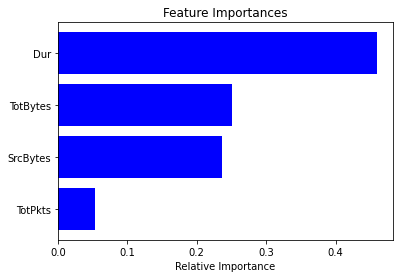

In [15]:
importances1 = classifier_1.feature_importances_
indices1 = np.argsort(importances1)

plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 2 Model 1**

In [20]:
scenario_2 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow')

In [22]:
# Generate binary malicious target column
scenario_2.loc[scenario_2['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_2.loc[scenario_2['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [25]:
# Checking to make sure that binary assignments worked
display(scenario_2.loc[scenario_2['SrcAddr'] == '147.32.84.165'])
display(scenario_2.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
353034,2011/08/11 10:27:20.087827,0.000151,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V43-UDP-DNS,1.0
353266,2011/08/11 10:27:22.334730,0.019477,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V43-UDP-DNS,1.0
353271,2011/08/11 10:27:22.355042,0.045459,tcp,147.32.84.165,1027,->,74.125.232.198,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V43-TCP-HTTP-Google-Net-Estab...,1.0
389373,2011/08/11 10:32:25.092354,0.200739,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,553,78,flow=From-Botnet-V43-UDP-DNS,1.0
389398,2011/08/11 10:32:25.294505,500.002960,tcp,147.32.84.165,1039,->,195.113.232.98,80,SPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V43-TCP-Established-HTTP-Ad-40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780033,2011/08/11 13:55:27.981810,2.982934,tcp,147.32.84.165,1123,->,67.195.168.230,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V43-TCP-Attempt-SPAM,1.0
1780035,2011/08/11 13:55:28.000203,0.139268,tcp,147.32.84.165,4383,->,217.163.21.39,80,FSPA_FSPA,0.0,0.0,10,1451,701,flow=From-Botnet-V43-TCP-WEB-Established,1.0
1780036,2011/08/11 13:55:28.000218,2.964543,tcp,147.32.84.165,1124,->,64.12.138.161,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V43-TCP-Attempt-SPAM,1.0
1780572,2011/08/11 13:55:34.577108,0.027338,tcp,147.32.84.165,4541,->,46.4.36.120,443,S_RA,0.0,0.0,2,122,62,flow=From-Botnet-V43-TCP-Attempt,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/11 09:49:35.721274,2069.973145,udp,203.253.8.233,30533,<->,147.32.84.229,13363,CON,0.0,0.0,3,197,123,flow=Background-UDP-Established,0.0
1,2011/08/11 09:49:35.721530,895.989258,tcp,81.47.154.13,49200,<?>,147.32.84.229,13363,RPA_PA,0.0,0.0,70,7032,4501,flow=Background,0.0
2,2011/08/11 09:49:35.721918,0.000120,udp,147.32.84.229,13363,->,78.42.25.171,42988,INT,0.0,NaN,3,2858,2858,flow=Background-UDP-Attempt,0.0
3,2011/08/11 09:49:35.722518,3561.927246,udp,147.32.84.229,13363,<->,113.128.219.130,59790,CON,0.0,0.0,63,15770,13419,flow=Background-UDP-Established,0.0
4,2011/08/11 09:49:35.723816,0.000000,udp,147.32.84.229,13363,->,60.50.167.24,40253,INT,0.0,NaN,1,60,60,flow=Background-UDP-Attempt,0.0


In [26]:
# Break data into target and features
y2 = scenario_2.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X2 = scenario_2[features].copy()

# Break data into training and testing data (80/20 split)
X2_train, X2_test, y2_train, y2_test, = train_test_split(X2,y2, train_size = 0.8, test_size = 0.2, random_state = 1)

In [27]:
# Generate base model
classifier_2 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_2.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [28]:
# Another very high accuracy score...potentially useless metric, very high TNs
predictions2 = classifier_2.predict(X2_test)

accuracy_score(y2_test, predictions2)

0.9956916695471828

In [30]:
# Much better F1 score than prior model... This reinvigorates my idea that insights can be derived from per-scenario models. 
f1_score(y2_test, predictions2)

0.8002564102564103

In [32]:
# Similar issue with model being skewed towards false positives, but to a much less extent than before, hence the improved F1
labels2 = np.unique(y2_test)
cm2 = confusion_matrix(y2_test, predictions2, labels=labels2)
pd.DataFrame(cm2, index=labels2, columns=labels2)

,0.0,1.0
0.0,356946,487
1.0,1071,3121


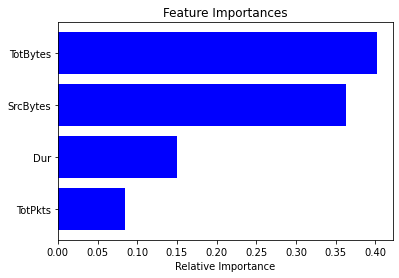

In [33]:
# Very interesting that importance differed here. Aggregate model generation should provide us with some fun insights.

importances2 = classifier_2.feature_importances_
indices2 = np.argsort(importances2)

plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [features[i] for i in indices2])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 3 Model 1**

In [34]:
scenario_3 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow')

In [35]:
# Generate binary malicious target column
scenario_3.loc[scenario_3['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_3.loc[scenario_3['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [36]:
# Checking to make sure that binary assignments worked
display(scenario_3.loc[scenario_3['SrcAddr'] == '147.32.84.165'])
display(scenario_3.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
61467,2011/08/12 15:53:17.142311,1966.745239,icmp,147.32.84.165,0x0303,->,81.166.246.198,0x8769,URP,0.0,NaN,3,285,285,flow=From-Botnet-V44-ICMP,1.0
178229,2011/08/12 16:56:52.873156,0.000456,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Botnet-V44-UDP-DNS,1.0
181700,2011/08/12 16:59:13.459181,0.121586,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,292,72,flow=From-Botnet-V44-UDP-DNS,1.0
181705,2011/08/12 16:59:13.581498,10.362481,tcp,147.32.84.165,1046,->,74.207.254.18,80,SPA_FSPA,0.0,0.0,9,1118,385,flow=From-Botnet-V44-TCP-WEB-Established,1.0
181711,2011/08/12 16:59:13.934712,0.101143,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,284,68,flow=From-Botnet-V44-UDP-DNS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520227,2011/08/15 09:25:26.819651,9.014144,tcp,147.32.84.165,2909,->,223.255.170.91,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt,1.0
4520295,2011/08/15 09:25:28.020389,9.013652,tcp,147.32.84.165,2910,->,223.255.178.83,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt,1.0
4532883,2011/08/15 09:29:18.079118,0.000000,udp,147.32.84.165,137,->,192.168.88.121,45366,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt,1.0
4576820,2011/08/15 09:42:00.883399,0.000000,udp,147.32.84.165,137,->,192.168.88.121,43886,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/12 15:24:01.105063,75.532112,tcp,74.125.108.243,80,<?>,147.32.86.187,55707,FPA_FA,0.0,0.0,8107,10096400,10005608,flow=Background,0.0
1,2011/08/12 15:24:01.105402,6.650236,tcp,147.32.84.164,22,<?>,83.208.193.123,15173,FPA_FPA,0.0,0.0,33,3218,1532,flow=From-Normal-V44-Grill,0.0
2,2011/08/12 15:24:01.106568,3599.641602,tcp,217.168.211.184,3953,<?>,147.32.84.14,22,PA_PA,0.0,0.0,1604343,1585303458,38328160,flow=Background,0.0
3,2011/08/12 15:24:01.113763,1341.314453,udp,173.9.132.155,54369,<->,147.32.84.59,15046,CON,0.0,0.0,284072,243446592,120384296,flow=Background-Established-cmpgw-CVUT,0.0
4,2011/08/12 15:24:01.119062,3599.992920,tcp,88.103.40.117,37378,<?>,147.32.84.59,56306,PA_PA,0.0,0.0,229138,213637628,206786146,flow=Background-Established-cmpgw-CVUT,0.0


In [37]:
# Break data into target and features
y3 = scenario_3.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X3 = scenario_3[features].copy()

# Break data into training and testing data (80/20 split)
X3_train, X3_test, y3_train, y3_test, = train_test_split(X3,y3, train_size = 0.8, test_size = 0.2, random_state = 1)

In [38]:
# Generate base model
classifier_3 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_3.fit(X3_train,y3_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [39]:
# Accuracy is useless here. I'll keep running it to check for major errors, but it is largely useless.
predictions3 = classifier_3.predict(X3_test)

accuracy_score(y3_test, predictions3)

0.9989077917225685

In [40]:
# Incredibly high f1 score
f1_score(y3_test, predictions3)

0.9041988641653477

In [41]:
# Best model so far
labels3 = np.unique(y3_test)
cm3 = confusion_matrix(y3_test, predictions3, labels=labels3)
pd.DataFrame(cm3, index=labels3, columns=labels3)

,0.0,1.0
0.0,936243,446
1.0,583,4856


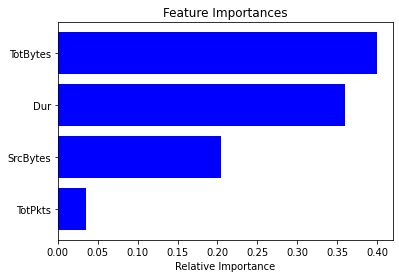

In [42]:
# The two models that have TotBytes as the most important (with Dur and SrcBytes following) have performed the best thusfar

importances3 = classifier_3.feature_importances_
indices3 = np.argsort(importances3)

plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances3[indices3], color='b', align='center')
plt.yticks(range(len(indices3)), [features[i] for i in indices3])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 4 Model 1**